In [41]:
import pandas as pd

SARCASM_HEADLINES_DATASET_PATH = "../datasets/Sarcasm_Headlines_Dataset.json"
MUSTARD_PLUS_PLUS_DATASET_PATH = "../datasets/mustard++_text.csv"
# From Sarcasm Corpus V2
# GEN (general sarcasm), HYP (hyperbole), and RQ (rhetorical questions).
GEN_SARC_NOTSARC_DATASET_PATH = "../datasets/GEN-sarc-notsarc.csv"
HYP_SARC_NOTSARC_DATASET_PATH = "../datasets/HYP-sarc-notsarc.csv"
RQ_SARC_NOTSARC_DATASET_PATH = "../datasets/RQ-sarc-notsarc.csv"
# Amazon Reviews Corpus
SARCASM_AMAZON_REVIEWS_REGULAR_DIR_PATH = (
    "../datasets/SarcasmAmazonReviewsCorpus-master/Regular"
)
SARCASM_AMAZON_REVIEWS_IRONIC_DIR_PATH = (
    "../datasets/SarcasmAmazonReviewsCorpus-master/Ironic"
)

In [42]:
combined_df = pd.DataFrame(columns=["sentence", "is_sarcastic"])

## Sarcasm headlines dataset


In [43]:
sarcasm_headlines_df: pd.DataFrame = pd.read_json(
    SARCASM_HEADLINES_DATASET_PATH, lines=True
)
print(sarcasm_headlines_df.head())
print(sarcasm_headlines_df.shape)

   is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...  
(28619, 3)


In [44]:
sarcasm_headlines_df = sarcasm_headlines_df.rename(
    columns={"headline": "sentence"}
).drop("article_link", axis=1)
combined_df = pd.concat([combined_df, sarcasm_headlines_df], ignore_index=True)
print(combined_df.head())

                                            sentence is_sarcastic
0  thirtysomething scientists unveil doomsday clo...            1
1  dem rep. totally nails why congress is falling...            0
2  eat your veggies: 9 deliciously different recipes            0
3  inclement weather prevents liar from getting t...            1
4  mother comes pretty close to using word 'strea...            1


## Mustard++ dataset


In [45]:
mustard_plus_plus_df = pd.read_csv(MUSTARD_PLUS_PLUS_DATASET_PATH)
print(mustard_plus_plus_df.shape)
mustard_plus_plus_df.head()

(6041, 12)


,SCENE,KEY,SENTENCE,END_TIME,SPEAKER,SHOW,Sarcasm,Sarcasm_Type,Implicit_Emotion,Explicit_Emotion,Valence,Arousal
0,1_10004,1_10004_c_00,"Well, I'm sure that, uh, you...\nhave a lot of...",0:06,PERSON,BBT,NaN,NaN,NaN,NaN,NaN,NaN
1,1_10004,1_10004_c_01,Who was he?,0:08,SHELDON,BBT,NaN,NaN,NaN,NaN,NaN,NaN
2,1_10004,1_10004_c_02,His name is Ron.\nI met him at my prayer group.,0:12,PERSON,BBT,NaN,NaN,NaN,NaN,NaN,NaN
3,1_10004,1_10004_c_03,How long have you been involved with him?,0:14,SHELDON,BBT,NaN,NaN,NaN,NaN,NaN,NaN
4,1_10004,1_10004_c_04,A few months.,0:16,PERSON,BBT,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
mustard_plus_plus_df = mustard_plus_plus_df.dropna(subset=["Sarcasm"])
mustard_plus_plus_df.head()

,SCENE,KEY,SENTENCE,END_TIME,SPEAKER,SHOW,Sarcasm,Sarcasm_Type,Implicit_Emotion,Explicit_Emotion,Valence,Arousal
5,1_10004,1_10004_u,"And of those few months, how long have you bee...",0:07,SHELDON,BBT,0.0,NONE,Anger,Anger,2.0,7.0
14,1_10009,1_10009_u,"Let the dead man talk. So, why do you think that?",0:05,PENNY,BBT,0.0,NONE,Happiness,Happiness,6.0,5.0
18,1_1001,1_1001_u,"What else? Sell it on eBay as ""slightly used.""",0:04,RAJ,BBT,0.0,NONE,Excitement,Excitement,6.0,5.0
24,1_1003,1_1003_u,"Good idea, sit with her. Hold her, comfort her...",0:08,HOWARD,BBT,1.0,PRO,Anger,Sadness,3.0,6.0
31,1_10190,1_10190_u,"Well, now that I've given up string theory, I'...",0:11,SHELDON,BBT,0.0,NONE,Neutral,Neutral,5.0,5.0


In [47]:
mustard_plus_plus_df = mustard_plus_plus_df[["SENTENCE", "Sarcasm"]].rename(
    columns={"SENTENCE": "sentence", "Sarcasm": "is_sarcastic"}
)
combined_df = pd.concat([combined_df, mustard_plus_plus_df], ignore_index=True)

print(combined_df.shape)

(29821, 2)


## Sarcasm Corpus V2


In [48]:
sarcasm_corpus_v2_gen_df = pd.read_csv(GEN_SARC_NOTSARC_DATASET_PATH)
print(sarcasm_corpus_v2_gen_df.head())
sarcasm_corpus_v2_hyp_df = pd.read_csv(HYP_SARC_NOTSARC_DATASET_PATH)
print(sarcasm_corpus_v2_hyp_df.head())
sarcasm_corpus_v2_rq_df = pd.read_csv(RQ_SARC_NOTSARC_DATASET_PATH)
print(sarcasm_corpus_v2_rq_df.head())

     class  id                                               text
0  notsarc   1  If that's true, then Freedom of Speech is doom...
1  notsarc   2  Neener neener - is it time to go in from the p...
2  notsarc   3  Just like the plastic gun fear, the armour pie...
3  notsarc   4  So geology is a religion because we weren't he...
4  notsarc   5  Well done Monty. Mark that up as your first ev...
     class  id                                               text
0  notsarc   1  have no predators to fear? check. who said we ...
1  notsarc   2  2 hours? damn!  that book took me a good 2 day...
2  notsarc   3  you never played myst? damn!!! i must be reall...
3  notsarc   4  Well, if Genesis was in fact true, then we wou...
4  notsarc   5  Just making sure that everybody is aware of hi...
     class  id                                               text
0  notsarc   1  Archie, the ONLY issue that gays don't have a ...
1  notsarc   2  No, not really. All that is different is the n...
2  notsarc

In [49]:
sarcasm_corpus_v2_df = pd.concat(
    [sarcasm_corpus_v2_gen_df, sarcasm_corpus_v2_hyp_df, sarcasm_corpus_v2_rq_df],
    ignore_index=True,
)
sarcasm_corpus_v2_df.head()

,class,id,text
0,notsarc,1,"If that's true, then Freedom of Speech is doom..."
1,notsarc,2,Neener neener - is it time to go in from the p...
2,notsarc,3,"Just like the plastic gun fear, the armour pie..."
3,notsarc,4,So geology is a religion because we weren't he...
4,notsarc,5,Well done Monty. Mark that up as your first ev...


In [50]:
sarcasm_corpus_v2_df["is_sarcastic"] = sarcasm_corpus_v2_df["class"].apply(
    lambda x: 0 if x == "notsarc" else 1
)
sarcasm_corpus_v2_df.head()

,class,id,text,is_sarcastic
0,notsarc,1,"If that's true, then Freedom of Speech is doom...",0
1,notsarc,2,Neener neener - is it time to go in from the p...,0
2,notsarc,3,"Just like the plastic gun fear, the armour pie...",0
3,notsarc,4,So geology is a religion because we weren't he...,0
4,notsarc,5,Well done Monty. Mark that up as your first ev...,0


In [51]:
sarcasm_corpus_v2_df = sarcasm_corpus_v2_df[["text", "is_sarcastic"]].rename(
    columns={"text": "sentence"}
)
sarcasm_corpus_v2_df.head()

,sentence,is_sarcastic
0,"If that's true, then Freedom of Speech is doom...",0
1,Neener neener - is it time to go in from the p...,0
2,"Just like the plastic gun fear, the armour pie...",0
3,So geology is a religion because we weren't he...,0
4,Well done Monty. Mark that up as your first ev...,0


In [52]:
combined_df = pd.concat([combined_df, sarcasm_corpus_v2_df], ignore_index=True)
print(combined_df.shape)

(39207, 2)


## Amazon reviews dataset


In [53]:
import os
import re

In [54]:
regular_txt_files: list[str] = [
    f for f in os.listdir(SARCASM_AMAZON_REVIEWS_REGULAR_DIR_PATH) if f.endswith(".txt")
]

regular_reviews: list[str] = []

for txt_file in regular_txt_files:
    with open(
        os.path.join(SARCASM_AMAZON_REVIEWS_REGULAR_DIR_PATH, txt_file),
        mode="r",
        encoding="ascii",
        errors="ignore",
    ) as f:
        content: str = f.read()
        review: list[str] = re.findall(r"<REVIEW>(.*?)</REVIEW>", content, re.DOTALL)
        regular_reviews.append(review[0]) if review else None

print(regular_reviews[:10])

["\nSo far no problems like the ones listed by previous reviewers. Everything works great. I love the drivers getting installed so easily with the included CD. Also when I tried to overclock the memory, after the reboot the motherboard didn't like the settings, so it rebooted itself again after that, and basically reset the memory settings to the old settings. Nice feature!\n \n System specs:\n - OCZ DDR3 PC3-10666 1333MHz Intel Extreme Edition XMP Ready Series 6GB Triple Channel Kit\n - Razer Lachesis Mouse\n - Samsung 22X SpeedPlus Serial ATA Internal DVD Writer\n - EVGA 512-P3-N879-AR GeForce 9800 GTX +\n - Western Digital 500GB Caviar\n", "\nIt's a bit bulkier than the \n apple one, but works just fine.\n \n", '\nJust received my new Aria last night. This is my first ever Android phone - Full Disclosure: I am coming from an old Blackberry & Moto Slvr so I am not exactly on the bleeding edge of smartphone development. My initial impression after about 4 hours of use is - fantastic p

In [55]:
ironic_txt_files: list[str] = [
    f for f in os.listdir(SARCASM_AMAZON_REVIEWS_IRONIC_DIR_PATH) if f.endswith(".txt")
]

ironic_reviews: list[str] = []

for txt_file in ironic_txt_files:
    with open(
        os.path.join(SARCASM_AMAZON_REVIEWS_IRONIC_DIR_PATH, txt_file),
        mode="r",
        encoding="ascii",
        errors="ignore",
    ) as f:
        content: str = f.read()
        review: list[str] = re.findall(r"<REVIEW>(.*?)</REVIEW>", content, re.DOTALL)
        ironic_reviews.append(review[0]) if review else None

print(ironic_reviews[:10])

['\nWilliam Hurt cannot read.  At all.  The cadence, inflection, and emotion of Hurt\'s reading are inappropriate in almost every circumstance, and the accents he attempts are laughable.  I pity the first-time audio listener who might mistakenly pick up this lamentable reading and be turned off audiobooks altogether.  There should be a warning label, "Danger, listening to William Hurt\'s reading of "The Sun Also Rises" is known to nauseate expectant listeners".  \n \n On the brighter side, I have listened to many other wonderful readings of Hemingway\'s works including "True at First Light" read by Brian Dennehy and "A Farewell to Arms" read by John Slattery.  Do yourself a favor and listen to a different reader.\n', '\nAs another reviewer noted, these used to be 10 for $10. Now 6 for $10, pretty outrageous.\n \n The tubes work just fine, but geez, nice way to reward customer loyalty....\n', "\nI've read several reviews from people who have wished that their Three Wolf Moon shirts had 

In [56]:
ironic_df = pd.DataFrame({"sentence": ironic_reviews, "is_sarcastic": 1})
regular_df = pd.DataFrame({"sentence": regular_reviews, "is_sarcastic": 0})

ironic_df.head()

,sentence,is_sarcastic
0,\nWilliam Hurt cannot read. At all. The cade...,1
1,"\nAs another reviewer noted, these used to be ...",1
2,\nI've read several reviews from people who ha...,1
3,\nIf you pay $250 for this blender you need yo...,1
4,\nA perfect date movie: you'll miss absolutely...,1


In [57]:
amazon_combined = pd.concat([ironic_df, regular_df], ignore_index=True)
amazon_combined.head()

,sentence,is_sarcastic
0,\nWilliam Hurt cannot read. At all. The cade...,1
1,"\nAs another reviewer noted, these used to be ...",1
2,\nI've read several reviews from people who ha...,1
3,\nIf you pay $250 for this blender you need yo...,1
4,\nA perfect date movie: you'll miss absolutely...,1


In [58]:
combined_df = pd.concat([combined_df, amazon_combined], ignore_index=True)
combined_df.shape

(40461, 2)

## Save to Parquet


In [59]:
combined_df.to_parquet("../datasets/combined.parquet")
combined_df.to_csv("../datasets/combined.csv")

## Some statistics


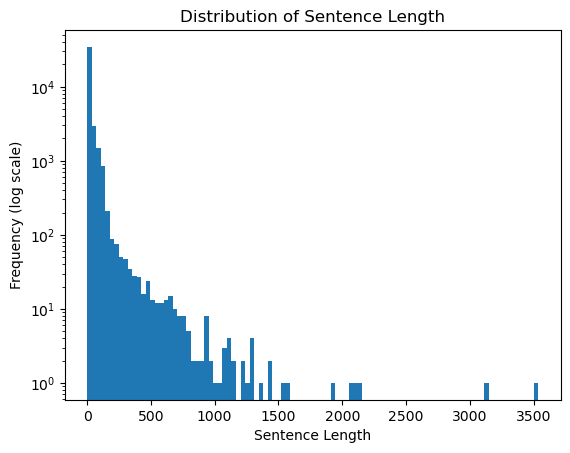

In [60]:
import matplotlib.pyplot as plt

combined_df["sentence_length"] = combined_df["sentence"].apply(lambda x: len(x.split()))
freq_counts, bin_edges, _ = plt.hist(combined_df["sentence_length"], bins=100)
plt.yscale("log")
plt.ylabel("Frequency (log scale)")
plt.xlabel("Sentence Length")
plt.title("Distribution of Sentence Length")
plt.show()